<a href="https://colab.research.google.com/github/Fulmo/ML_ITMM/blob/master/lab1_imdb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Load & Overview

Link to the dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [0]:
import seaborn as sns

from pandas import read_csv
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
imdb = read_csv('/content/drive/My Drive/ITMM/lab1/tmdb_5000_movies.csv')
imdb = imdb.dropna(how='all')
imdb

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [4]:
imdb.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
imdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Movie Ratings Sub-data

In [7]:
movie_ratings = imdb[['original_title','vote_average', 'vote_count']]
movie_ratings = movie_ratings.sort_values(['vote_average', 'vote_count'], ascending=[False, False])
movie_ratings.head(10)

,original_title,vote_average,vote_count
4247,Me You and Five Bucks,10.0,2
3519,Stiff Upper Lips,10.0,1
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
1881,The Shawshank Redemption,8.5,8205
2970,There Goes My Baby,8.5,2
3337,The Godfather,8.4,5893
2796,The Prisoner of Zenda,8.4,11


In [8]:
most_voted=movie_ratings[movie_ratings.vote_count >=1000]
most_voted.head(10)

,original_title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
662,Fight Club,8.3,9413
3232,Pulp Fiction,8.3,8428
1818,Schindler's List,8.3,4329
3865,Whiplash,8.3,4254
2294,千と千尋の神隠し,8.3,3840
2731,The Godfather: Part II,8.3,3338
65,The Dark Knight,8.2,12002
809,Forrest Gump,8.2,7927


In [9]:
most_voted.describe()

,vote_average,vote_count
count,924.000000,924.000000
mean,6.767100,2566.481602
std,0.745575,1813.289977
min,4.100000,1000.000000
25%,6.200000,1345.750000
50%,6.700000,1914.500000
75%,7.300000,3095.250000
max,8.500000,13752.000000


# 2. Formatting&Clean Data

*   This preprocessing is good to do corr analasys and remove zero numeric values. 
*  Also according to most_voted movies subdata 



In [10]:
imdb = imdb[imdb['budget']!=0]
imdb = imdb[imdb['vote_average']!=0.]
imdb = imdb[imdb['revenue']!=0]
imdb.shape

(3227, 20)

In [11]:
imdb = imdb[imdb['budget']>= 1000]
imdb = imdb[imdb.vote_count >=100]
imdb.shape

(2710, 20)

See distribution to check budget

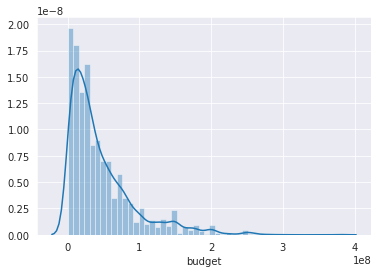

In [12]:
sns.set_style('darkgrid')
sns.distplot(imdb.budget)

## Add Year Column

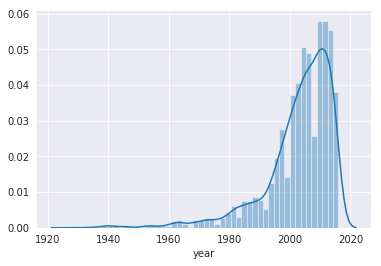

In [13]:
from pandas import to_datetime
imdb.release_date = to_datetime(imdb.release_date)
imdb['year'] = imdb.release_date.dt.year
# use a visualisation to see what portion of movies are older that 20 years
sns.set_style('darkgrid')
sns.distplot(imdb['year'])

In [14]:
imdb.year.unique()

array([2009, 2007, 2015, 2012, 2010, 2016, 2006, 2008, 2013, 2011, 2014,
       2005, 1997, 2004, 1999, 1995, 2003, 2001, 2002, 1998, 2000, 1990,
       1991, 1994, 1996, 1982, 1993, 1992, 1989, 1984, 1988, 1978, 1962,
       1980, 1985, 1940, 1963, 1987, 1973, 1983, 1979, 1986, 1981, 1977,
       1976, 1970, 1971, 1960, 1964, 1927, 1974, 1975, 1965, 1968, 1967,
       1969, 1972, 1961, 1954, 1939, 1946, 1958, 1957, 1966, 1959, 1952,
       1951, 1953, 1945, 1937, 1955, 1942, 1934])

In [15]:
imdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year
count,2.710000e+03,2710.000000,2710.000000,2.710000e+03,2710.000000,2710.000000,2710.000000,2710.000000
mean,4.568932e+07,46138.412915,33.741242,1.420835e+08,111.134686,6.375683,1154.821771,2002.878598
std,4.629663e+07,77402.237162,37.669642,1.964813e+08,20.191770,0.828058,1478.824699,11.726473
min,7.000000e+03,5.000000,1.041254,1.200000e+01,63.000000,3.000000,100.000000,1927.000000
25%,1.400000e+07,2988.000000,14.972834,3.000000e+07,97.000000,5.800000,297.000000,1999.000000
50%,3.000000e+07,10585.500000,24.880727,7.570797e+07,107.000000,6.400000,610.500000,2006.000000
75%,6.000000e+07,49025.000000,41.497234,1.699892e+08,122.000000,7.000000,1367.250000,2011.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,248.000000,8.500000,13752.000000,2016.000000


## Format dict-like objects
Parse the stringified features into their corresponding python objects

In [16]:
from ast import literal_eval

features = [ 'keywords', 'genres','production_companies','production_countries','spoken_languages']
for feature in features:
    imdb[feature] = imdb[feature].apply(literal_eval)
    
# Returns the top element.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        names =' '.join(names[:1])
    return names

for feature in features:
    imdb[feature] = imdb[feature].apply(get_list)
    
imdb[['title','keywords', 'genres','production_companies','production_countries','spoken_languages']].sample(5)



,title,keywords,genres,production_companies,production_countries,spoken_languages
3239,Stand by Me,based on novel,Crime,Columbia Pictures,United States of America,English
2093,Jackass 3D,pain,Comedy,MTV Films,United States of America,Română
2539,Snitch,father son relationship,Thriller,Front Street Productions,United States of America,English
3331,The Neon Demon,model,Thriller,Bold Films,Denmark,English
3000,Insidious: Chapter 3,sequel,Drama,Sony Pictures,Canada,English


In [17]:
imdb.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,Action,http://www.avatarmovie.com/,19995,culture clash,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,United States of America,2009-12-10,2787965087,162.0,English,Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,ocean,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,spy,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures,United Kingdom,2015-10-26,880674609,148.0,Français,Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,Action,http://www.thedarkknightrises.com/,49026,dc comics,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures,United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,Action,http://movies.disney.com/john-carter,49529,based on novel,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012


# 3. Covariance & Correlation

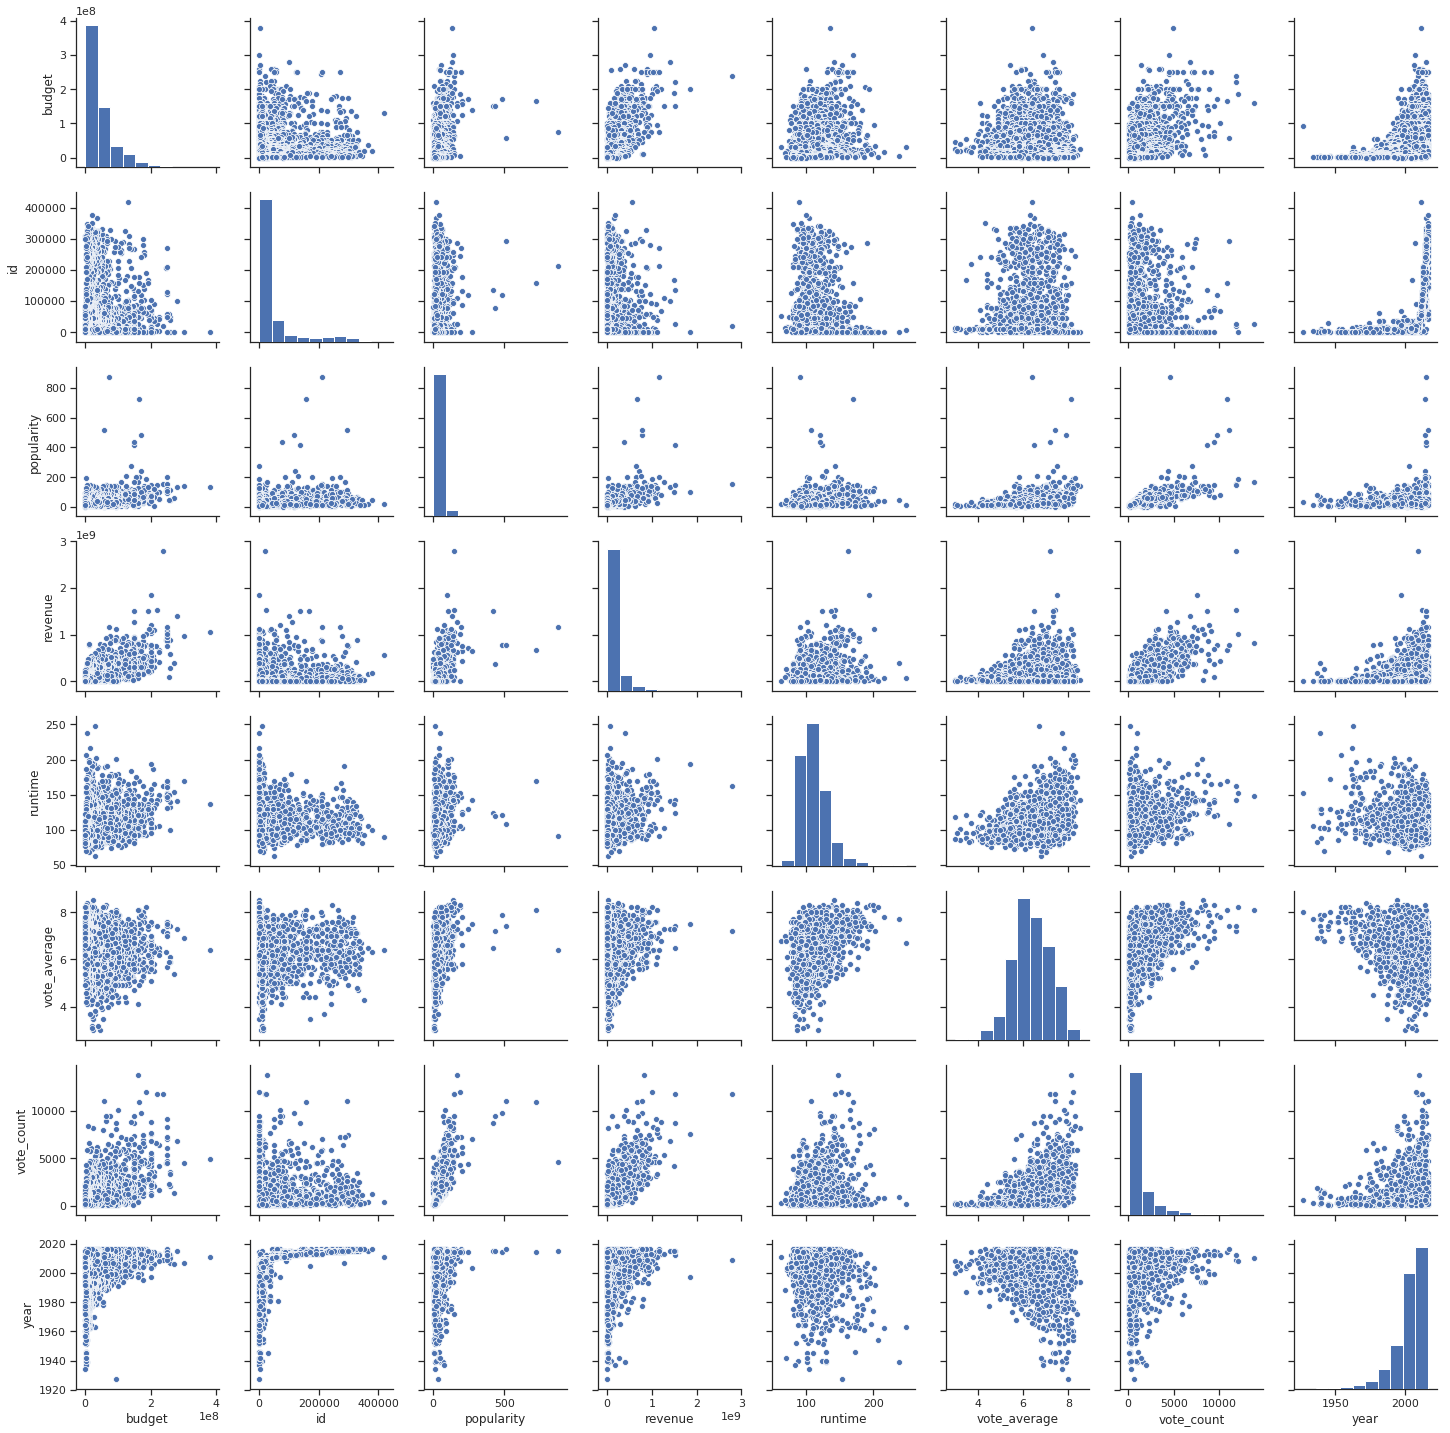

In [18]:
sns.set(style='ticks')
sns.pairplot(imdb)

In [19]:
imdb.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year
budget,1.000000,0.006407,0.388436,0.690790,0.252030,-0.072994,0.508859,0.256029
id,0.006407,1.000000,0.183492,0.020353,-0.040757,-0.052246,0.104822,0.480907
popularity,0.388436,0.183492,1.000000,0.570574,0.200384,0.282674,0.725897,0.128476
revenue,0.690790,0.020353,0.570574,1.000000,0.257510,0.170767,0.737814,0.121013
runtime,0.252030,-0.040757,0.200384,0.257510,1.000000,0.411508,0.289790,-0.163975
vote_average,-0.072994,-0.052246,0.282674,0.170767,0.411508,1.000000,0.393107,-0.249303
vote_count,0.508859,0.104822,0.725897,0.737814,0.289790,0.393107,1.000000,0.147773
year,0.256029,0.480907,0.128476,0.121013,-0.163975,-0.249303,0.147773,1.000000


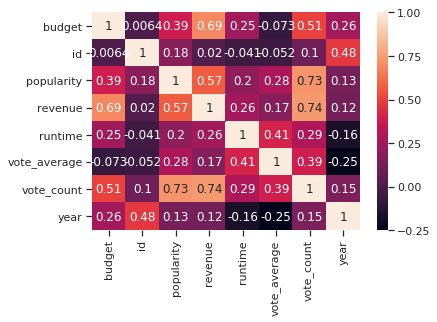

In [20]:
sns.heatmap(imdb.corr(), annot=True)
plt.show()

In [21]:
most_voted.corr()

,vote_average,vote_count
vote_average,1.000000,0.370931
vote_count,0.370931,1.000000


In [22]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2710 entries, 0 to 4798
Data columns (total 21 columns):
budget                  2710 non-null int64
genres                  2710 non-null object
homepage                1221 non-null object
id                      2710 non-null int64
keywords                2710 non-null object
original_language       2710 non-null object
original_title          2710 non-null object
overview                2710 non-null object
popularity              2710 non-null float64
production_companies    2710 non-null object
production_countries    2710 non-null object
release_date            2710 non-null datetime64[ns]
revenue                 2710 non-null int64
runtime                 2710 non-null float64
spoken_languages        2710 non-null object
status                  2710 non-null object
tagline                 2586 non-null object
title                   2710 non-null object
vote_average            2710 non-null float64
vote_count              2710 n

## Correlation Budget And Revenue

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


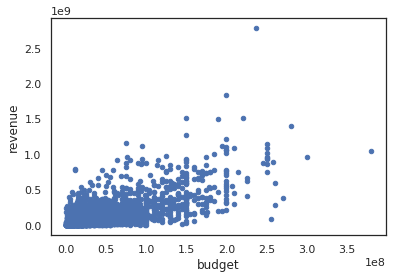

In [23]:
sns.set(style="white", color_codes=True)
imdb.plot(kind='scatter', x='budget', y='revenue')

### Including Genres info

In [24]:
imdb.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Music',
       'Documentary'], dtype=object)

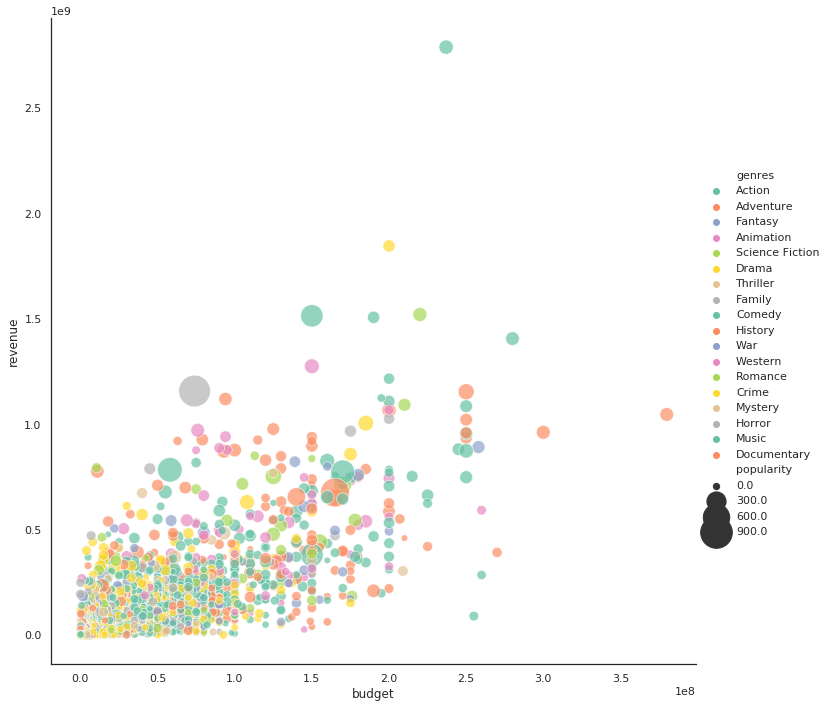

In [25]:
sns.relplot(x="budget", y="revenue", data= imdb, size ="popularity", hue = 'genres', palette = 'Set2',alpha=.7,sizes=(40,1000),height=10)

## Correlation Between Budget And Ratings

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


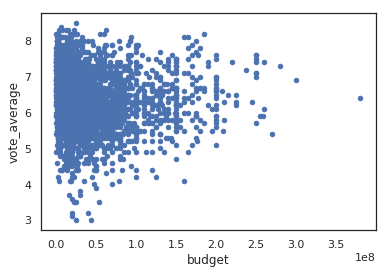

In [26]:
sns.set(style="white", color_codes=True)
imdb.plot(kind='scatter', x='budget', y='vote_average')

### Including Popularity info

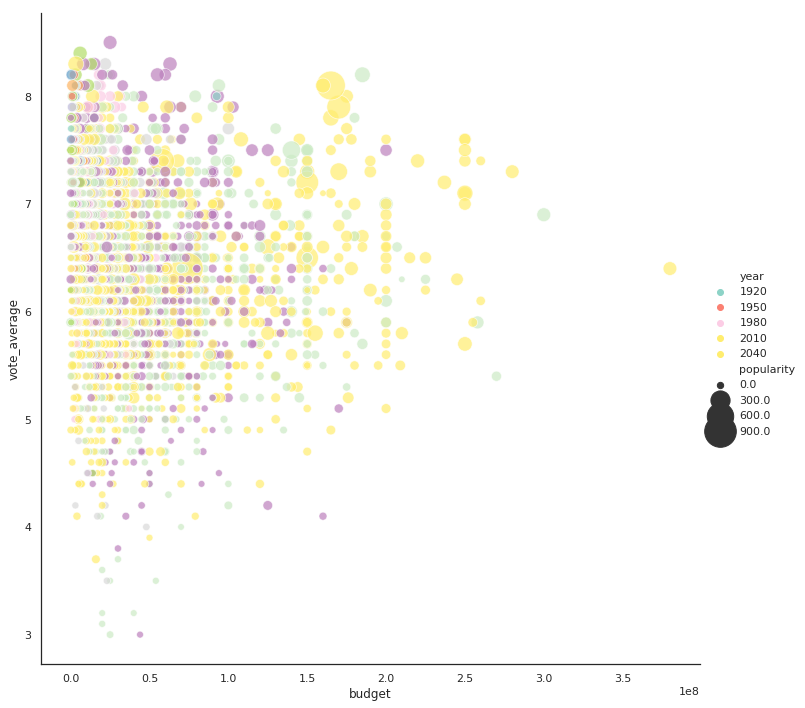

In [27]:
sns.relplot(x="budget", y="vote_average", data= imdb, size ="popularity", hue = 'year', palette = 'Set3',alpha=.7,sizes=(40,1000),height=10)

## Correlation Between Revenue And Ratings

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


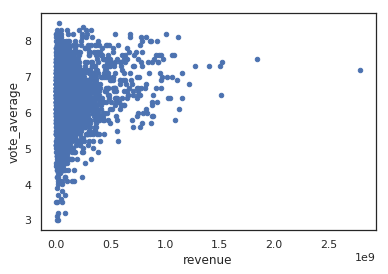

In [28]:
imdb.plot(kind='scatter', x='revenue', y='vote_average')

### Including Vote Counts info

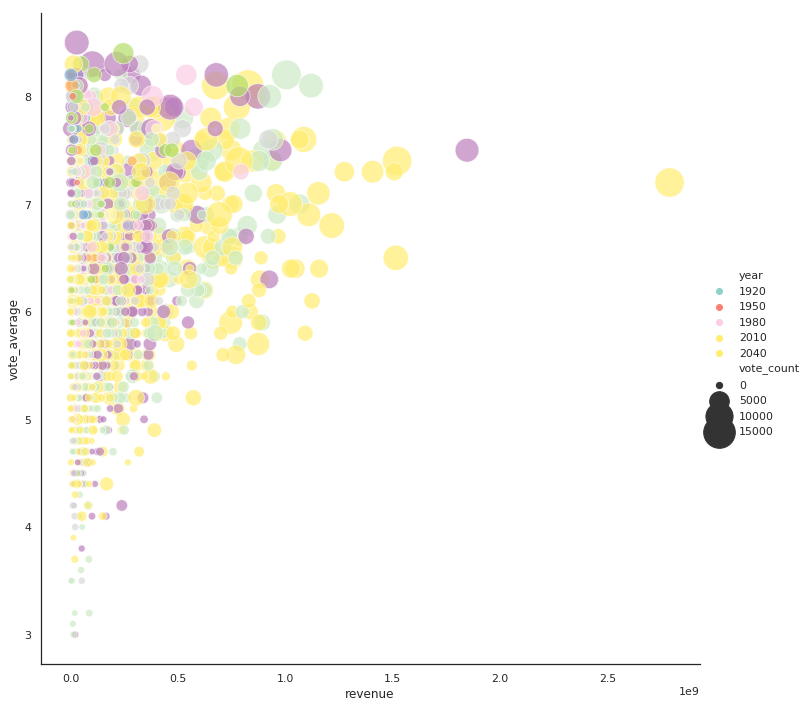

In [29]:
sns.relplot(x="revenue", y="vote_average", data= imdb, size ="vote_count", hue = 'year', palette = 'Set3',alpha=.7,sizes=(40,1000),height=10)

In [30]:
imdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'ko', 'te', 'cn', 'es', 'nl', 'ru', 'de',
       'th', 'xx', 'it', 'da', 'nb', 'pt', 'pl', 'he', 'hi', 'id', 'ro',
       'no', 'fa'], dtype=object)

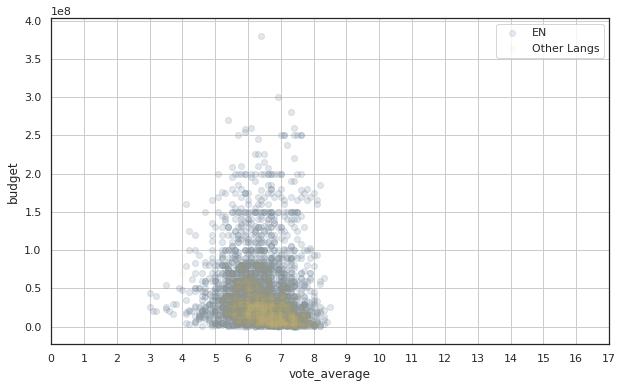

In [31]:
plt.figure(figsize = (10, 6))

plt.scatter(imdb[imdb['original_language'] == 'en']['vote_average'],
            imdb[imdb['original_language'] == 'en']['budget'],
            alpha = 0.15,
            label = 'EN',
            color = 'b')

plt.scatter(imdb[imdb['original_language']!='EN']['vote_average'],
            imdb[imdb['original_language']!='EN']['budget'],
            alpha = 0.05,
            label = 'Other Langs',
            color = 'Y')

plt.xlabel('vote_average')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('budget')
plt.legend()
plt.grid()



In [32]:
imdb.describe(include = ['object'])

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,spoken_languages,status,tagline,title
count,2710,1221,2710,2710,2710,2710,2710,2710,2710,2710,2586,2710
unique,18,1201,944,24,2710,2710,597,44,42,1,2579,2709
top,Drama,http://www.missionimpossible.com/,based on novel,en,No Strings Attached,A fading actor best known for his portrayal of...,Paramount Pictures,United States of America,English,Released,What could go wrong?,The Host
freq,567,4,71,2619,1,1,209,1877,2388,2710,2,2


In [33]:
imdb.describe(include = 'all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
count,2.710000e+03,2710,1221,2710.000000,2710,2710,2710,2710,2710.000000,2710,2710,2710,2.710000e+03,2710.000000,2710,2710,2586,2710,2710.000000,2710.000000,2710.000000
unique,NaN,18,1201,NaN,944,24,2710,2710,NaN,597,44,2163,NaN,NaN,42,1,2579,2709,NaN,NaN,NaN
top,NaN,Drama,http://www.missionimpossible.com/,NaN,based on novel,en,No Strings Attached,A fading actor best known for his portrayal of...,NaN,Paramount Pictures,United States of America,2014-12-25 00:00:00,NaN,NaN,English,Released,What could go wrong?,The Host,NaN,NaN,NaN
freq,NaN,567,4,NaN,71,2619,1,1,NaN,209,1877,7,NaN,NaN,2388,2710,2,2,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.568932e+07,NaN,NaN,46138.412915,NaN,NaN,NaN,NaN,33.741242,NaN,NaN,NaN,1.420835e+08,111.134686,NaN,NaN,NaN,NaN,6.375683,1154.821771,2002.878598
std,4.629663e+07,NaN,NaN,77402.237162,NaN,NaN,NaN,NaN,37.669642,NaN,NaN,NaN,1.964813e+08,20.191770,NaN,NaN,NaN,NaN,0.828058,1478.824699,11.726473
min,7.000000e+03,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,1.041254,NaN,NaN,NaN,1.200000e+01,63.000000,NaN,NaN,NaN,NaN,3.000000,100.000000,1927.000000
25%,1.400000e+07,NaN,NaN,2988.000000,NaN,NaN,NaN,NaN,14.972834,NaN,NaN,NaN,3.000000e+07,97.000000,NaN,NaN,NaN,NaN,5.800000,297.000000,1999.000000


# 4. Improved Data Cleaning&Preparing
Clean data for further algorithms training

In [0]:
# not needed info
imdb = imdb.drop('homepage', axis = 1)\
            .drop('id', axis = 1)\
            .drop('keywords',    axis = 1)\
            .drop('overview', axis = 1)\
            .drop('tagline', axis = 1)\
            .drop('release_date', axis=1)

In [35]:
imdb.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'year'],
      dtype='object')

In [36]:
imdb.status.unique()

array(['Released'], dtype=object)

In [37]:
imdb = imdb.drop(['status','original_title'], axis = 1)
imdb.columns

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'spoken_languages', 'title', 'vote_average', 'vote_count', 'year'],
      dtype='object')

In [38]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2710 entries, 0 to 4798
Data columns (total 13 columns):
budget                  2710 non-null int64
genres                  2710 non-null object
original_language       2710 non-null object
popularity              2710 non-null float64
production_companies    2710 non-null object
production_countries    2710 non-null object
revenue                 2710 non-null int64
runtime                 2710 non-null float64
spoken_languages        2710 non-null object
title                   2710 non-null object
vote_average            2710 non-null float64
vote_count              2710 non-null int64
year                    2710 non-null int64
dtypes: float64(3), int64(4), object(6)
memory usage: 376.4+ KB


In [39]:
categorical_columns = [c for c in imdb.columns if imdb[c].dtype.name == 'object']
numerical_columns   = [c for c in imdb.columns if imdb[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['genres', 'original_language', 'production_companies', 'production_countries', 'spoken_languages', 'title']
['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'year']


## Fill Empty/NaN Values

In [40]:
imdb.median(axis=0)

budget          3.000000e+07
popularity      2.488073e+01
revenue         7.570797e+07
runtime         1.070000e+02
vote_average    6.400000e+00
vote_count      6.105000e+02
year            2.006000e+03
dtype: float64

In [0]:
imdb = imdb.fillna(imdb.median(axis = 0), axis = 0)

### Check corectness and missing values

In [42]:
imdb[numerical_columns].count(axis = 0)

budget          2710
popularity      2710
revenue         2710
runtime         2710
vote_average    2710
vote_count      2710
year            2710
dtype: int64

In [43]:
imdb[categorical_columns].count(axis = 0)

genres                  2710
original_language       2710
production_companies    2710
production_countries    2710
spoken_languages        2710
title                   2710
dtype: int64

In [0]:
# direct method
from pandas import DataFrame
miss_values: DataFrame = imdb.isna()

for val in miss_values.values:
  if val is True:
    print(val)

In [45]:
imdb.describe(include = [object])

,genres,original_language,production_companies,production_countries,spoken_languages,title
count,2710,2710,2710,2710,2710,2710
unique,18,24,597,44,42,2709
top,Drama,en,Paramount Pictures,United States of America,English,The Host
freq,567,2619,209,1877,2388,2


## Standartization

### Numerical Features

In [46]:
imdb[numerical_columns].head(10)

,budget,popularity,revenue,runtime,vote_average,vote_count,year
0,237000000,150.437577,2787965087,162.0,7.2,11800,2009
1,300000000,139.082615,961000000,169.0,6.9,4500,2007
2,245000000,107.376788,880674609,148.0,6.3,4466,2015
3,250000000,112.312950,1084939099,165.0,7.6,9106,2012
4,260000000,43.926995,284139100,132.0,6.1,2124,2012
5,258000000,115.699814,890871626,139.0,5.9,3576,2007
6,260000000,48.681969,591794936,100.0,7.4,3330,2010
7,280000000,134.279229,1405403694,141.0,7.3,6767,2015
8,250000000,98.885637,933959197,153.0,7.4,5293,2009
9,250000000,155.790452,873260194,151.0,5.7,7004,2016


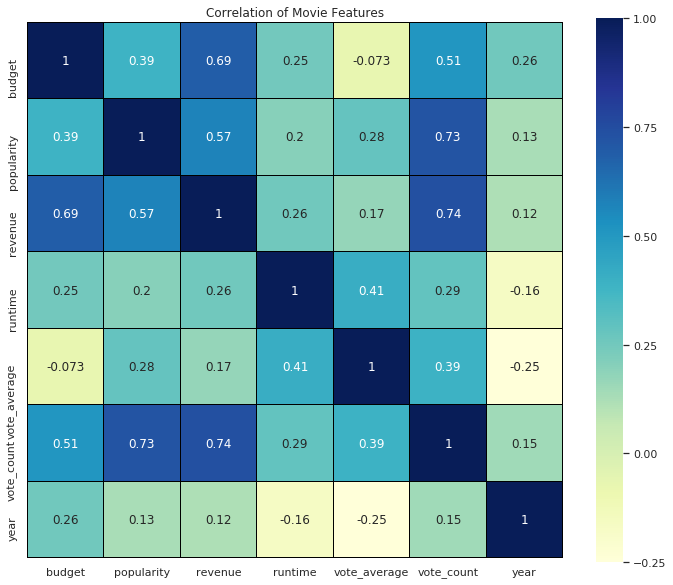

In [47]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Correlation of Movie Features')
sns.heatmap(imdb[numerical_columns].astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [48]:
imdb[numerical_columns].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year
count,2.710000e+03,2710.000000,2.710000e+03,2710.000000,2710.000000,2710.000000,2710.000000
mean,4.568932e+07,33.741242,1.420835e+08,111.134686,6.375683,1154.821771,2002.878598
std,4.629663e+07,37.669642,1.964813e+08,20.191770,0.828058,1478.824699,11.726473
min,7.000000e+03,1.041254,1.200000e+01,63.000000,3.000000,100.000000,1927.000000
25%,1.400000e+07,14.972834,3.000000e+07,97.000000,5.800000,297.000000,1999.000000
50%,3.000000e+07,24.880727,7.570797e+07,107.000000,6.400000,610.500000,2006.000000
75%,6.000000e+07,41.497234,1.699892e+08,122.000000,7.000000,1367.250000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,248.000000,8.500000,13752.000000,2016.000000


### Categorical Features (Make classes)

In [0]:
from pandas import cut
imdb['rating_classes'] = cut(imdb['vote_average'], 10, labels=["1", "2","3","4","5","6","7","8","9","10"]) 

In [0]:
imdb['revenue_classes'] = cut(imdb['revenue'],10)

In [51]:
imdb.head(10)

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,rating_classes,revenue_classes
0,237000000,Action,en,150.437577,Ingenious Film Partners,United States of America,2787965087,162.0,English,Avatar,7.2,11800,2009,8,"(2509168579.5, 2787965087.0]"
1,300000000,Adventure,en,139.082615,Walt Disney Pictures,United States of America,961000000,169.0,English,Pirates of the Caribbean: At World's End,6.9,4500,2007,8,"(836389534.5, 1115186042.0]"
2,245000000,Action,en,107.376788,Columbia Pictures,United Kingdom,880674609,148.0,Français,Spectre,6.3,4466,2015,6,"(836389534.5, 1115186042.0]"
3,250000000,Action,en,112.312950,Legendary Pictures,United States of America,1084939099,165.0,English,The Dark Knight Rises,7.6,9106,2012,9,"(836389534.5, 1115186042.0]"
4,260000000,Action,en,43.926995,Walt Disney Pictures,United States of America,284139100,132.0,English,John Carter,6.1,2124,2012,6,"(278796519.5, 557593027.0]"
5,258000000,Fantasy,en,115.699814,Columbia Pictures,United States of America,890871626,139.0,English,Spider-Man 3,5.9,3576,2007,6,"(836389534.5, 1115186042.0]"
6,260000000,Animation,en,48.681969,Walt Disney Pictures,United States of America,591794936,100.0,English,Tangled,7.4,3330,2010,8,"(557593027.0, 836389534.5]"
7,280000000,Action,en,134.279229,Marvel Studios,United States of America,1405403694,141.0,English,Avengers: Age of Ultron,7.3,6767,2015,8,"(1393982549.5, 1672779057.0]"
8,250000000,Adventure,en,98.885637,Warner Bros.,United Kingdom,933959197,153.0,English,Harry Potter and the Half-Blood Prince,7.4,5293,2009,8,"(836389534.5, 1115186042.0]"
9,250000000,Action,en,155.790452,DC Comics,United States of America,873260194,151.0,English,Batman v Superman: Dawn of Justice,5.7,7004,2016,5,"(836389534.5, 1115186042.0]"


# 5. Splitting Train Data

In [52]:
# X_rating = imdb.ix[:, (0,3,6,7,10,11,12)].values
# Y_rating = imdb.ix[:,13].values

X_rating = imdb[numerical_columns]
Y_rating = imdb['rating_classes']
print(X_rating.shape)
print(Y_rating.shape)
# X_revenue = imdb.drop((['rating_classes', 'revenue_classes']), axis=1)
# y_revenue = imdb['revenue_classes']

(2710, 7)
(2710,)


In [0]:
from sklearn.preprocessing import StandardScaler
X_rating = StandardScaler().fit_transform(X_rating)

In [55]:
X_rating

array([[ 4.13304383,  3.09845981, 13.46881559, ...,  0.99566627,
         7.19973289,  0.52211196],
       [ 5.49408523,  2.79696882,  4.16868066, ...,  0.63330597,
         2.26246937,  0.35152622],
       [ 4.30587448,  1.95513235,  3.75978562, ..., -0.09141463,
         2.2394739 ,  1.03386918],
       ...,
       [-0.98680508, -0.77497377, -0.69273071, ..., -0.2122014 ,
        -0.70665211, -2.63372423],
       [-0.9869131 , -0.27701931, -0.72111137, ...,  0.63330597,
        -0.33601918,  0.09564761],
       [-0.98231148, -0.51699571, -0.71288434, ...,  0.27094567,
        -0.62008092, -0.92786683]])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_rating, Y_rating, test_size = 0.1, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2439 271


# 6. Supervised Classification

## K-NN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_rating, Y_rating)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [58]:
import numpy as np
y_train_predict = knn.predict(X_rating)
y_test_predict = knn.predict(X_test)

err_train = np.mean(Y_rating != y_train_predict)
err_test  = np.mean(Y_test  != y_test_predict)

print(err_train, err_test)

0.17269372693726937 0.19557195571955718


### HyperParameters Selection

In [59]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.23042230422304222 5


In [60]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

0.14555145551455514 0.23985239852398524


## SVC

In [61]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

err_train = np.mean(Y_train != svc.predict(X_train))
err_test  = np.mean(Y_test  != svc.predict(X_test))

print(err_train, err_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.056580565805658053 0.07749077490774908


### HyperParameters Selection

In [62]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.006560065600656029 10000.0


In [64]:
svc = SVC(C = best_C).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.14555145551455514 0.23985239852398524


# 7. Unsupervised Classification

## K-Means

To add scatter plots and normal evaluatings

In [0]:
from sklearn.cluster import  KMeans
kmeans = KMeans(n_clusters = 10)

In [0]:
X_clustered = kmeans.fit_predict(X_train)

In [67]:
kmeans.labels_

array([0, 3, 9, ..., 3, 7, 0], dtype=int32)

In [68]:
kmeans.cluster_centers_

array([[-1.80748959e-01,  1.12712807e+00,  5.56791496e-01,
         4.82479306e-01,  1.36246727e+00,  1.79876544e+00,
        -5.23606024e-02],
       [-3.47554475e-01, -4.43524857e-01, -4.42139273e-01,
        -7.48367624e-01, -1.34347259e+00, -5.39505279e-01,
         2.41269587e-01],
       [ 2.73569598e+00,  2.06150742e+00,  3.62403574e+00,
         1.32524984e+00,  9.05076197e-01,  3.45439204e+00,
         5.65943022e-01],
       [-5.70031438e-01, -2.32958887e-01, -4.41150413e-01,
        -4.33107688e-01,  2.80712255e-01, -3.05560555e-01,
         4.33722653e-01],
       [ 2.09888680e+00,  6.67369811e-01,  1.42614270e+00,
         3.22933791e-01, -1.19522247e-01,  9.25954224e-01,
         5.20502664e-01],
       [-6.71002594e-01, -3.27234723e-01, -3.76077728e-01,
        -2.96617865e-01,  3.24570828e-01, -4.40317996e-01,
        -1.44881509e+00],
       [-8.06178241e-01, -5.78064353e-02, -3.60214911e-01,
         1.35877961e+00,  1.31988339e+00, -2.50409094e-01,
        -3.4709410

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


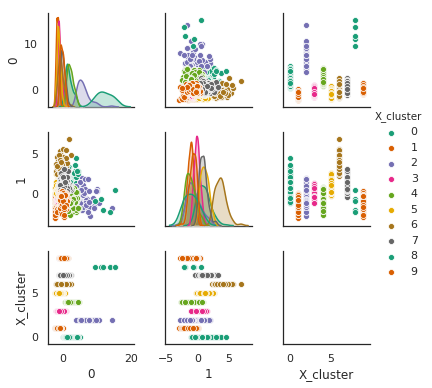

In [71]:
df= DataFrame(X_pca)
df['X_cluster'] = X_clustered
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)